In [1]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import mnist

(train_images, train_labels), _ = mnist.load_data()

mirror_images = tf.identity(train_images)
mirror_images = tf.image.flip_left_right(mirror_images)
mirror_images = tf.reshape(mirror_images, [60000, 28 * 28])
mirror_images = tf.cast(mirror_images, "float32") / 255

train_images = tf.reshape(train_images, [60000, 28 * 28])
train_images = tf.cast(train_images, "float32") / 255

test_images = train_images[:10000]
train_images = train_images[10000:]
mirror_images = mirror_images[10000:]

In [2]:
mirror_images.shape
# train_images.shape

TensorShape([50000, 784])

In [3]:
from tensorflow import keras
from tensorflow.keras import layers

model = keras.Sequential([
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(512, activation="relu"),
    layers.Dropout(0.5),
    layers.Dense(784)
])

model.compile(optimizer="adam",
              loss="mean_squared_error",
              metrics=["mse"])

The train_images is trained to its mirror image in mirror_images with no activation function used. This means the output layer (784 nodes) is directly subtracted from the mirror image  to form the mean square error, which constitutes the objective function for the back propagation.

In [4]:
history = model.fit(
    train_images, mirror_images,
    epochs=20,
    batch_size=128,
    validation_split=0.2)

Epoch 1/20
313/313 [==============================] - 3s 8ms/step - loss: 0.0505 - mse: 0.0505 - val_loss: 0.0305 - val_mse: 0.0305
Epoch 2/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0341 - mse: 0.0341 - val_loss: 0.0248 - val_mse: 0.0248
Epoch 3/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0308 - mse: 0.0308 - val_loss: 0.0220 - val_mse: 0.0220
Epoch 4/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0291 - mse: 0.0291 - val_loss: 0.0210 - val_mse: 0.0210
Epoch 5/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0279 - mse: 0.0279 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 6/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0271 - mse: 0.0271 - val_loss: 0.0192 - val_mse: 0.0192
Epoch 7/20
313/313 [==============================] - 2s 8ms/step - loss: 0.0266 - mse: 0.0266 - val_loss: 0.0183 - val_mse: 0.0183
Epoch 8/20
313/313 [==============================] - 2s 8ms/step - loss: 0.

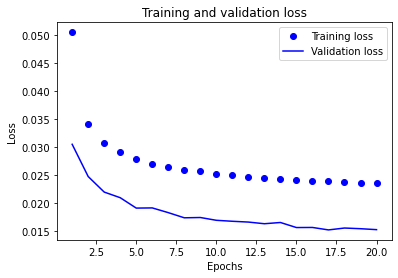

In [5]:
import matplotlib.pyplot as plt
history_dict = history.history
loss_values = history_dict["loss"]
val_loss_values = history_dict["val_loss"]
epochs = range(1, len(loss_values) + 1)
plt.plot(epochs, loss_values, "bo", label="Training loss")
plt.plot(epochs, val_loss_values, "b", label="Validation loss")
plt.title("Training and validation loss")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()
plt.show()

In [6]:
predictions = model.predict(test_images, batch_size=128)

79/79 [==============================] - 0s 2ms/step


In [7]:
predictions.shape

(10000, 784)

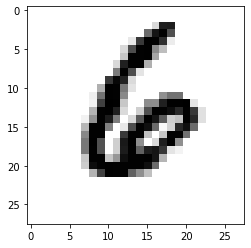

In [8]:
import matplotlib.pyplot as plt

digit = tf.reshape(test_images[13], [28,28])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
# plt.savefig('test_images_145.png', bbox_inches='tight')

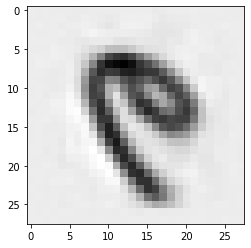

In [9]:
digit = tf.reshape(predictions[13], [28,28])
plt.imshow(digit, cmap=plt.cm.binary)
plt.show()
# plt.savefig('predictions_145.png', bbox_inches='tight')